# EW_Airlines Clustering 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading Dataset
xls=pd.ExcelFile("C:\\Users\\Hi\\Desktop\\Python Datasets\\EastWestAirlines1.xlsx")
ewa=pd.read_excel(xls,'data')
ewa.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
ewa.shape

(3999, 12)

In [4]:
#checking for null values
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#Descriptio of each column
ewa.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Figure size 2000x2000 with 0 Axes>

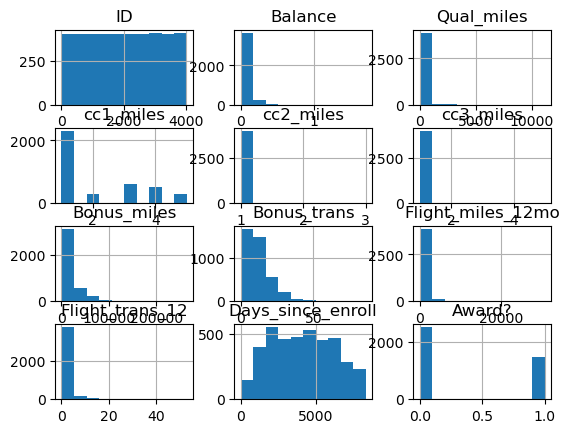

In [6]:
plt.figure(figsize=(20,20))
ewa.hist()
plt.show()

ID                      AxesSubplot(0.125,0.712609;0.227941x0.167391)
Balance              AxesSubplot(0.398529,0.712609;0.227941x0.167391)
Qual_miles           AxesSubplot(0.672059,0.712609;0.227941x0.167391)
cc1_miles               AxesSubplot(0.125,0.511739;0.227941x0.167391)
cc2_miles            AxesSubplot(0.398529,0.511739;0.227941x0.167391)
cc3_miles            AxesSubplot(0.672059,0.511739;0.227941x0.167391)
Bonus_miles              AxesSubplot(0.125,0.31087;0.227941x0.167391)
Bonus_trans           AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Flight_miles_12mo     AxesSubplot(0.672059,0.31087;0.227941x0.167391)
Flight_trans_12             AxesSubplot(0.125,0.11;0.227941x0.167391)
Days_since_enroll        AxesSubplot(0.398529,0.11;0.227941x0.167391)
Award?                   AxesSubplot(0.672059,0.11;0.227941x0.167391)
dtype: object

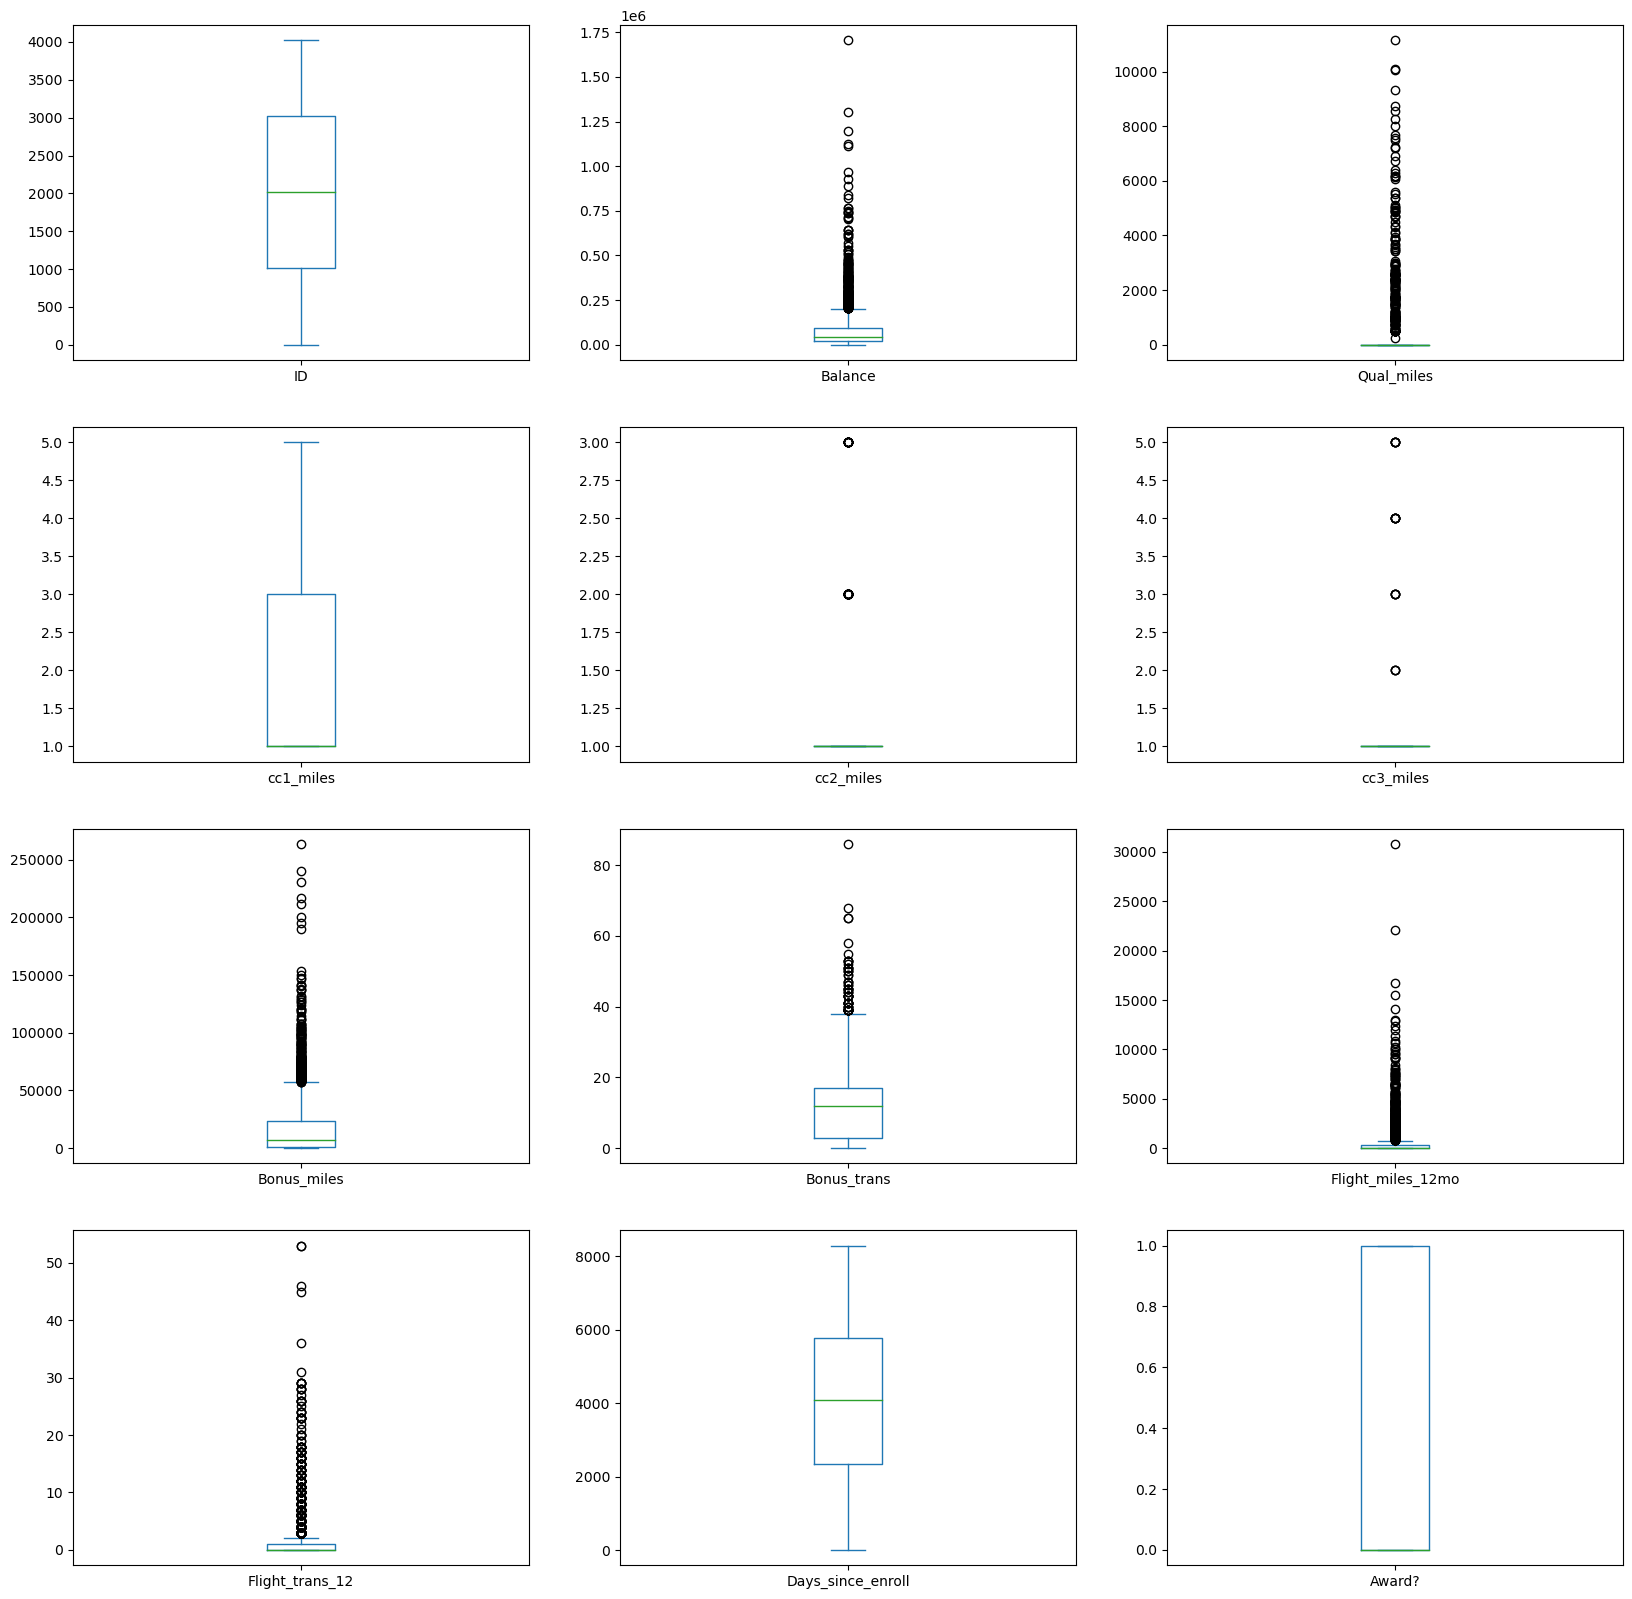

In [7]:
ewa.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20)) #Boxplot for each column to check the outliers 

In [8]:
ewa.shape

(3999, 12)

from scipy import stats
dfzz=stats.zscore(ewa)
dfabs=np.abs(dfzz)
df_filter=(dfabs<3).all(axis=1)
df_filter

ewa=ewa[df_filter]
ewa.shape

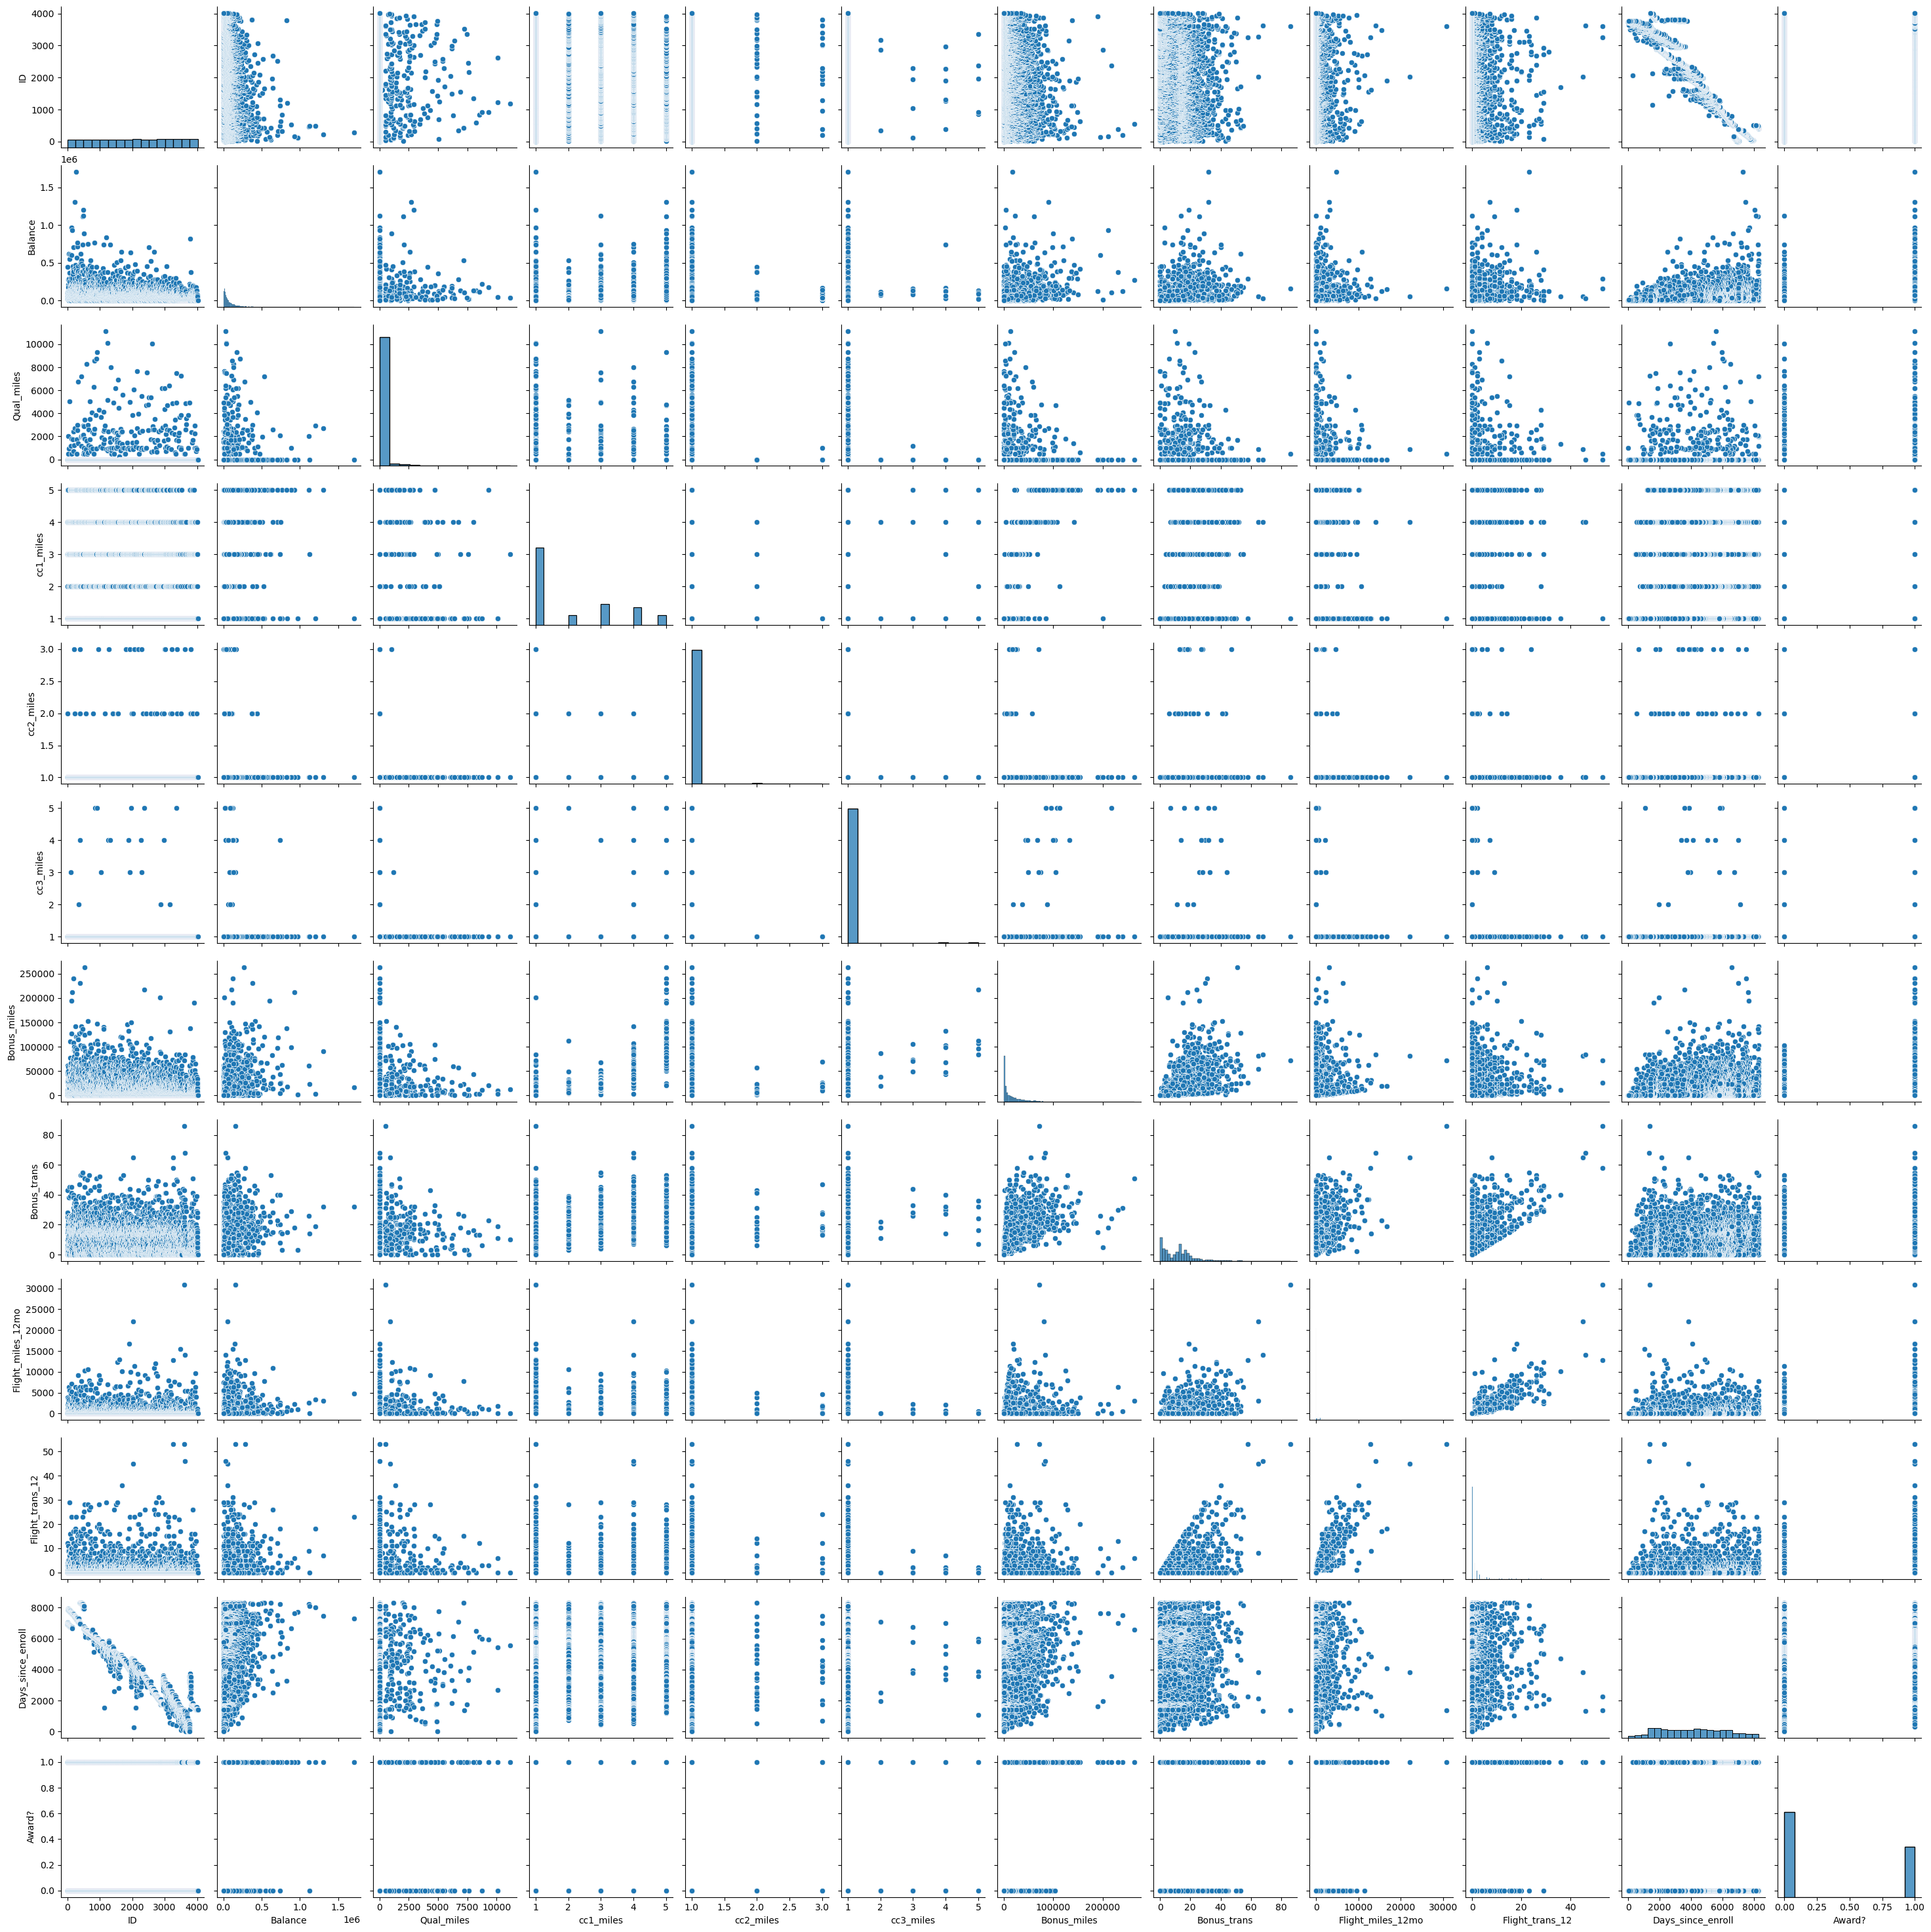

In [9]:
sns.pairplot(ewa) #pairplot to see correlation between the columns 

In [10]:
ewa.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [11]:
ewa1=ewa.drop(['ID'],axis=1) #here id column is not necessary so dropping it

In [12]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
from sklearn.preprocessing import MinMaxScaler
norm =MinMaxScaler(feature_range=(2,3))
columns=ewa1.columns
d=norm.fit_transform(ewa1)
ewa2=pd.DataFrame(d,columns=columns)
ewa2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2.016508,2.0,2.00,2.0,2.0,2.000660,2.011628,2.000000,2.000000,2.843742,2.0
1,2.011288,2.0,2.00,2.0,2.0,2.000815,2.023256,2.000000,2.000000,2.839884,2.0
2,2.024257,2.0,2.00,2.0,2.0,2.015636,2.046512,2.000000,2.000000,2.847842,2.0
3,2.008667,2.0,2.00,2.0,2.0,2.001896,2.011628,2.000000,2.000000,2.837955,2.0
4,2.057338,2.0,2.75,2.0,2.0,2.164211,2.302326,2.067398,2.075472,2.835905,3.0


In [14]:
#scaler=StandardScaler()
#ewa_std=scaler.fit_transform(ewa1)
#ewa2=pd.DataFrame(ewa_std,columns=ewa1.columns)
#ewa2.head()

Balance                 AxesSubplot(0.125,0.712609;0.227941x0.167391)
Qual_miles           AxesSubplot(0.398529,0.712609;0.227941x0.167391)
cc1_miles            AxesSubplot(0.672059,0.712609;0.227941x0.167391)
cc2_miles               AxesSubplot(0.125,0.511739;0.227941x0.167391)
cc3_miles            AxesSubplot(0.398529,0.511739;0.227941x0.167391)
Bonus_miles          AxesSubplot(0.672059,0.511739;0.227941x0.167391)
Bonus_trans              AxesSubplot(0.125,0.31087;0.227941x0.167391)
Flight_miles_12mo     AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Flight_trans_12       AxesSubplot(0.672059,0.31087;0.227941x0.167391)
Days_since_enroll           AxesSubplot(0.125,0.11;0.227941x0.167391)
Award?                   AxesSubplot(0.398529,0.11;0.227941x0.167391)
dtype: object

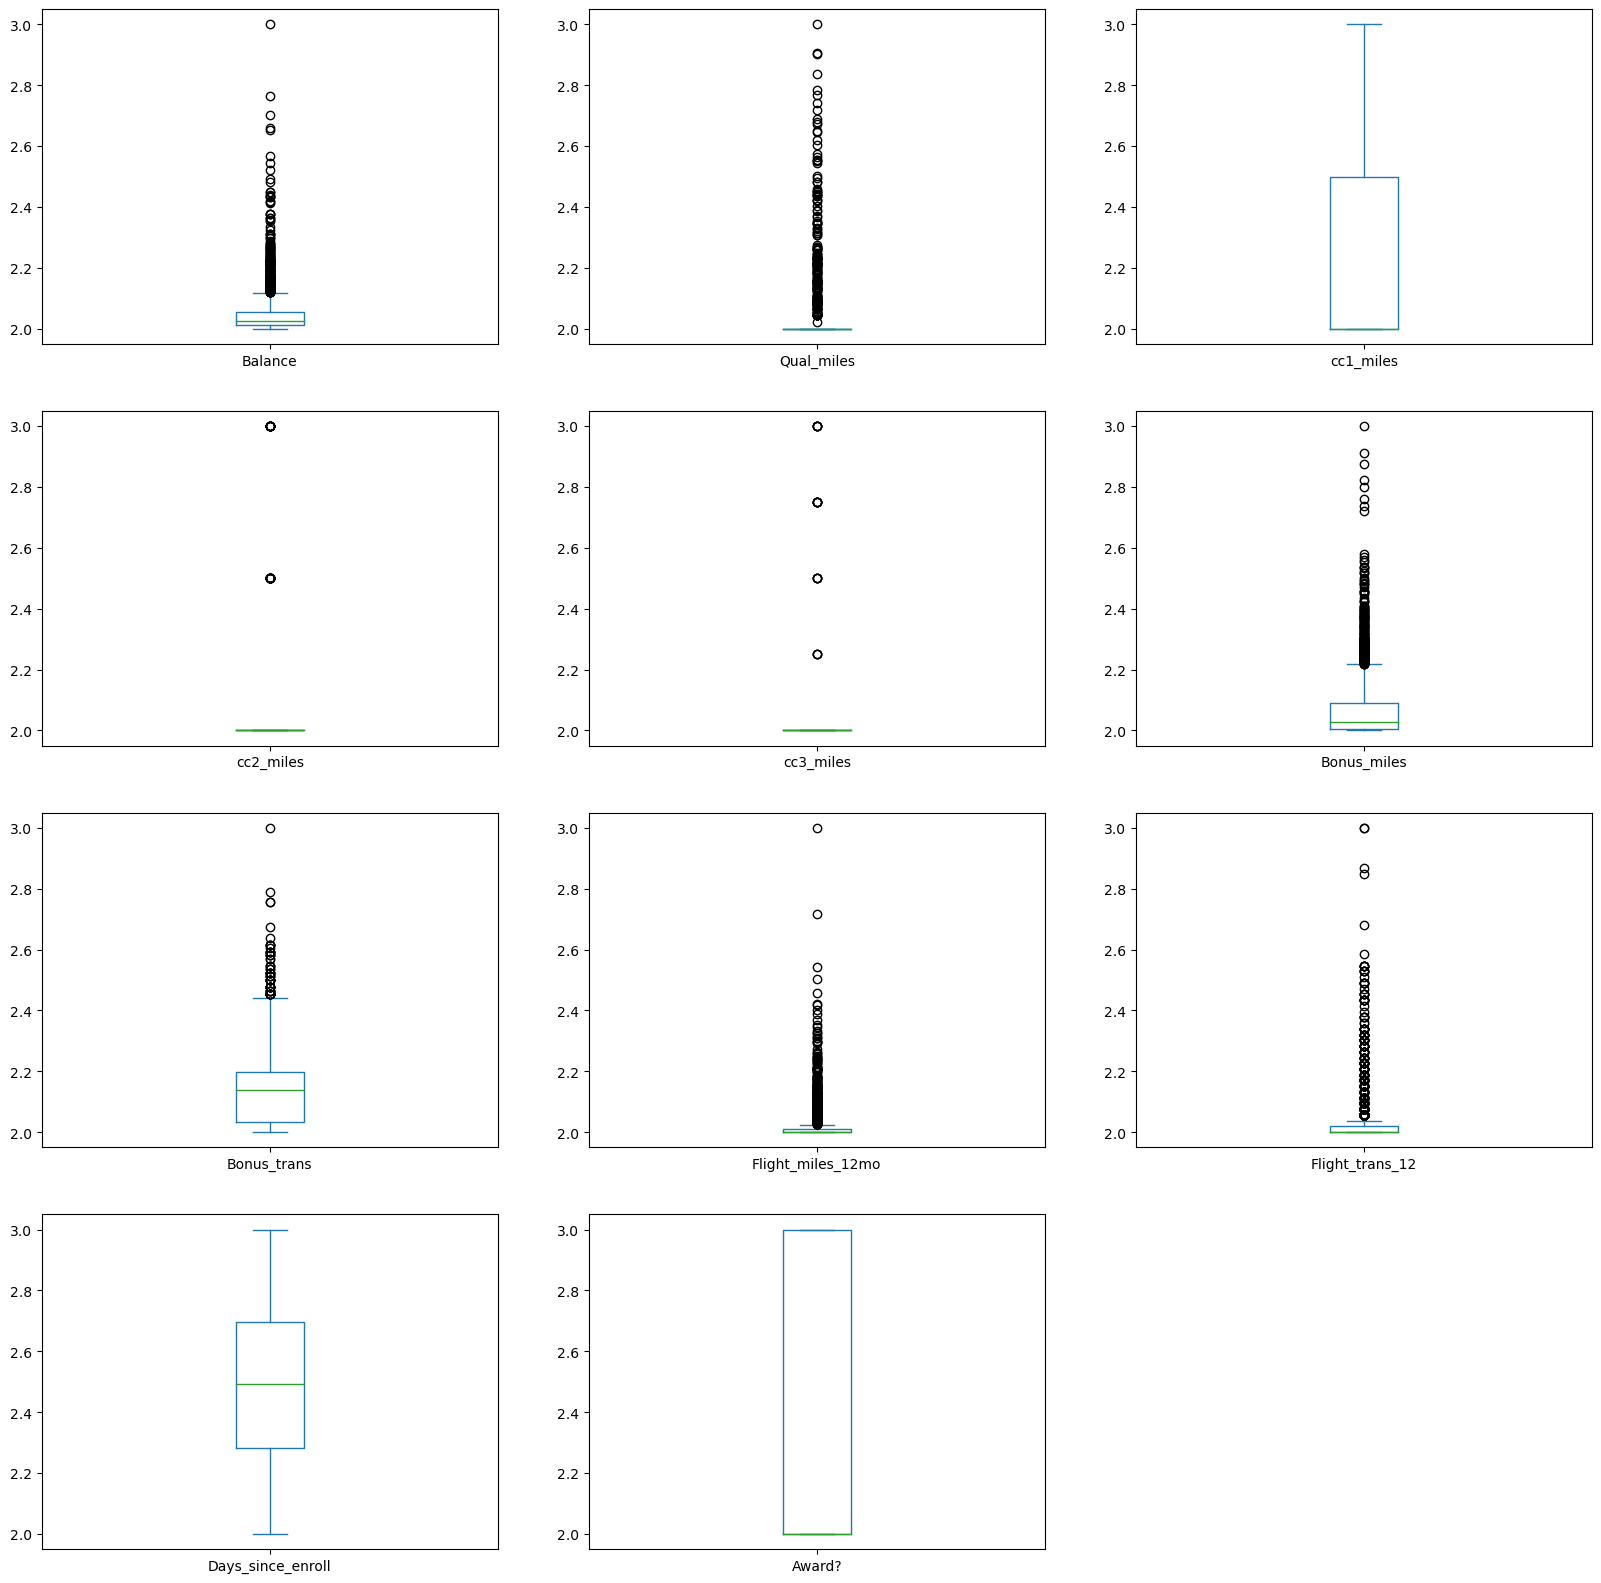

In [15]:
ewa2.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

# Model Creation using DBSCAN

In [16]:
dbscan=DBSCAN(eps=0.9,min_samples=20)
ew_dbscan=dbscan.fit(ewa2)

In [17]:
np.unique(dbscan.labels_)


array([0, 1], dtype=int64)

In [18]:
ewa1['Clusters_dbscan']=dbscan.labels_ #adding dbcan labels to ewa1 to use it with actual dataset
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [19]:
#Silhoutte score to check the clusters are  correctly divided
from sklearn.metrics import silhouette_score
db_score = silhouette_score(ewa2,dbscan.labels_,metric='euclidean')
db_score

0.5359305109194763

# Model Creation using KMeans Clustering

In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans()

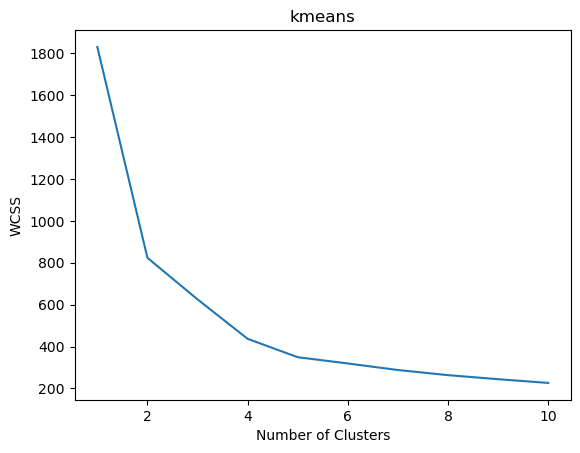

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(ewa2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('kmeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans1=KMeans(n_clusters=5,random_state=0)
ew_kmeans =kmeans1.fit(ewa2)
Clusters=kmeans1.labels_
Clusters

array([4, 4, 4, ..., 0, 1, 1])

In [23]:
np.unique(Clusters)

array([0, 1, 2, 3, 4])

In [24]:
ewa1['Clusters_kmeans']=kmeans1.labels_
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [25]:
ewa1[ewa1['Clusters_kmeans']==0].mean(),ewa1[ewa1['Clusters_kmeans']==1].mean()

(Balance              108317.387376
 Qual_miles              198.336634
 cc1_miles                 3.915842
 cc2_miles                 1.001238
 cc3_miles                 1.025990
 Bonus_miles           45609.657178
 Bonus_trans              20.201733
 Flight_miles_12mo       713.728960
 Flight_trans_12           2.142327
 Days_since_enroll      4863.439356
 Award?                    1.000000
 Clusters_dbscan           1.000000
 Clusters_kmeans           0.000000
 dtype: float64,
 Balance              33097.301357
 Qual_miles              94.131783
 cc1_miles                1.070736
 cc2_miles                1.016473
 cc3_miles                1.006783
 Bonus_miles           3244.520349
 Bonus_trans              6.173450
 Flight_miles_12mo      212.850775
 Flight_trans_12          0.603682
 Days_since_enroll     1992.402132
 Award?                   0.000000
 Clusters_dbscan          0.000000
 Clusters_kmeans          1.000000
 dtype: float64)

In [26]:
ewa1[ewa1['Clusters_kmeans']==3].mean(),ewa1[ewa1['Clusters_kmeans']==4].mean()

(Balance              83529.153046
 Qual_miles             290.453195
 cc1_miles                1.156018
 cc2_miles                1.032689
 cc3_miles                1.008915
 Bonus_miles           8850.395245
 Bonus_trans             10.476969
 Flight_miles_12mo     1030.112927
 Flight_trans_12          3.148588
 Days_since_enroll     4338.867756
 Award?                   1.000000
 Clusters_dbscan          1.000000
 Clusters_kmeans          3.000000
 dtype: float64,
 Balance              49921.633641
 Qual_miles              89.903226
 cc1_miles                1.122120
 cc2_miles                1.019585
 cc3_miles                1.001152
 Bonus_miles           3467.074885
 Bonus_trans              6.913594
 Flight_miles_12mo      243.834101
 Flight_trans_12          0.728111
 Days_since_enroll     5567.925115
 Award?                   0.000000
 Clusters_dbscan          0.000000
 Clusters_kmeans          4.000000
 dtype: float64)

In [27]:
#Silhoutte score to check the clusters are  correctly divided
km_score=silhouette_score(ewa2,kmeans1.labels_,metric='euclidean')
km_score

0.44306720727960125

# Model Creation using Hierarchical Clustering

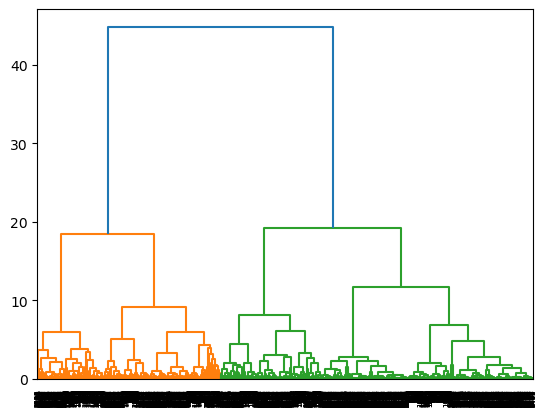

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram=sch.dendrogram(sch.linkage(ewa2,method='ward'))

In [29]:
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='single')
ew_hc=hc.fit(ewa2)

In [30]:
np.unique(ew_hc.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [31]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [32]:
ewa1['Clusters_hc']=hc.labels_
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans,Clusters_hc
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0


In [33]:
#Silhoutte score to check the clusters are  correctly divided
hc_score=silhouette_score(ewa2,hc.labels_,metric='euclidean')
hc_score

0.4327930185753193

# Model Creation using KPROTOTYPE algorithm

In [34]:
ewa2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2.016508,2.0,2.00,2.0,2.0,2.000660,2.011628,2.000000,2.000000,2.843742,2.0
1,2.011288,2.0,2.00,2.0,2.0,2.000815,2.023256,2.000000,2.000000,2.839884,2.0
2,2.024257,2.0,2.00,2.0,2.0,2.015636,2.046512,2.000000,2.000000,2.847842,2.0
3,2.008667,2.0,2.00,2.0,2.0,2.001896,2.011628,2.000000,2.000000,2.837955,2.0
4,2.057338,2.0,2.75,2.0,2.0,2.164211,2.302326,2.067398,2.075472,2.835905,3.0


In [35]:
#column indexes which contain data of categorical behavior
cat_idx=[2,3,4,10]

# We are going to go with Kprototype as our data has 4 columns of Categorical behavior apart from numerical data columns while kprototype uses kmeans for numerical data and kmodes for categorical data

In [36]:
from kmodes.kprototypes import KPrototypes
#kproto=KPrototypes(n_clusters=5,verbose=2,max_iter=20)

In [37]:
#kproto.fit(ewa2,categorical=cat_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/5, moves: 0, ncost: 718.49954062821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/5

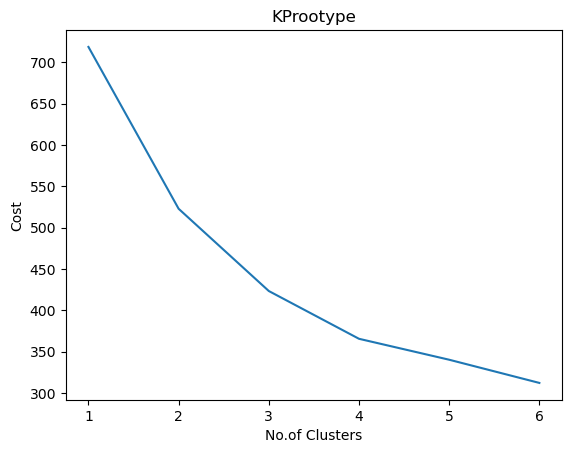

In [38]:
cost=[]
for i in range(1,7):
    kproto=KPrototypes(n_clusters=i,verbose=2,max_iter=5)
    kproto.fit(ewa2,categorical=cat_idx)
    cost.append(kproto.cost_)
plt.plot(range(1,7),cost)
plt.title('KProotype')
plt.xlabel("No.of Clusters")
plt.ylabel("Cost")
plt.show()

In [39]:

kproto1=KPrototypes(n_clusters=4,verbose=2,max_iter=20)
kp=kproto1.fit(ewa2,categorical=cat_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1073, ncost: 437.77590365079254
Run: 1, iteration: 2/20, moves: 370, ncost: 432.23375118710044
Run: 1, iteration: 3/20, moves: 286, ncost: 427.17999675044865
Run: 1, iteration: 4/20, moves: 211, ncost: 424.3630299197266
Run: 1, iteration: 5/20, moves: 411, ncost: 386.4590292045236
Run: 1, iteration: 6/20, moves: 651, ncost: 374.02450069684863
Run: 1, iteration: 7/20, moves: 152, ncost: 373.046633780942
Run: 1, iteration: 8/20, moves: 77, ncost: 372.7932421156018
Run: 1, iteration: 9/20, moves: 27, ncost: 372.7525923794455
Run: 1, iteration: 10/20, moves: 16, ncost: 372.7332712686642
Run: 1, iteration: 11/20, moves: 4, ncost: 372.73135880584067
Run: 1, iteration: 12/20, moves: 2, ncost: 372.73104174060205
Run: 1, iteration: 13/20, moves: 1, ncost: 372.7308924417964
Run: 1, iteration: 14/20, moves: 1, n

In [40]:
ewa1['Clusters_kprototype']=kproto1.labels_

In [41]:
kpro_score=silhouette_score(ewa2,kproto1.labels_,metric='euclidean')
kpro_score

0.27505517707878324

In [42]:
ewa1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_dbscan,Clusters_kmeans,Clusters_hc,Clusters_kprototype
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0,2


In [43]:
from sklearn.decomposition import PCA
pca=PCA(2)
df_ewa=pca.fit_transform(ewa2)
df_ewa.shape

(3999, 2)

# Kprototype Clustering Plot

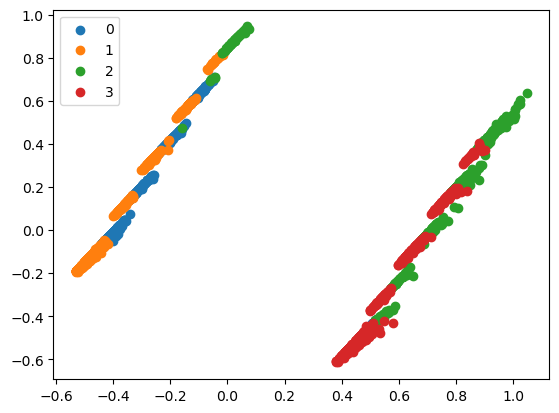

In [44]:
d=np.unique(kp.labels_)

#plotting KPrototype clusters using tranformed data using 'PCA'
for i in d:
    plt.scatter(df_ewa[kp.labels_==i,0],df_ewa[kp.labels_==i,1],label=i)
plt.legend()
plt.show()
    

# Hierarchical Clustering Plot

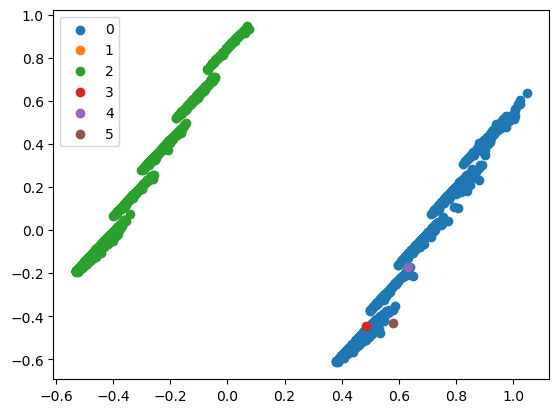

In [45]:
e=np.unique(ew_hc.labels_)
#using ew_hc which is Hierarchical Clustering model 
for i in e:
    plt.scatter(df_ewa[ew_hc.labels_==i,0],df_ewa[ew_hc.labels_==i,1],label=i)
plt.legend()
plt.show()

# Kmeans Clustering Plot

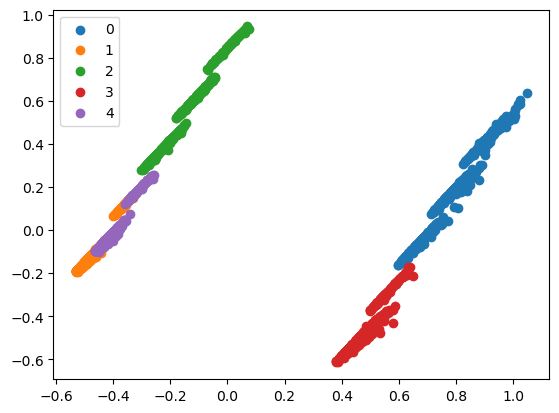

In [46]:
f=np.unique(ew_kmeans.labels_)
for i in f:
    plt.scatter(df_ewa[ew_kmeans.labels_==i,0],df_ewa[ew_kmeans.labels_==i,1],label=i)
plt.legend()
plt.show()

# DBscan Clustering Plot

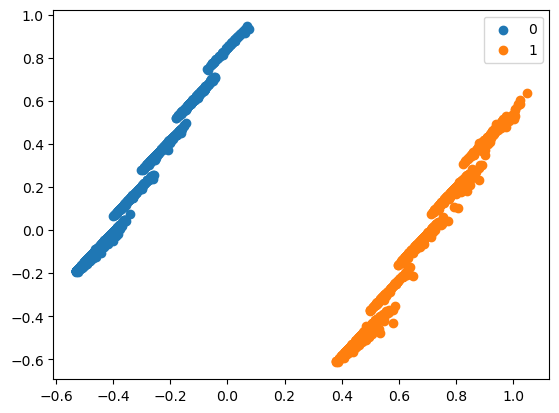

In [47]:
g=np.unique(ew_dbscan.labels_)
for i in g:
    plt.scatter(df_ewa[ew_dbscan.labels_==i,0],df_ewa[ew_dbscan.labels_==i,1],label=i)
plt.legend()
plt.show()

In [48]:
ewa1[ewa1['Clusters_kprototype']==0].mean(),ewa1[ewa1['Clusters_kprototype']==1].mean()

(Balance                72546.443257
 Qual_miles               100.710526
 cc1_miles                  1.678454
 cc2_miles                  1.013158
 cc3_miles                  1.000822
 Bonus_miles             9379.963816
 Bonus_trans                9.091283
 Flight_miles_12mo        255.487664
 Flight_trans_12            0.757401
 Days_since_enroll       5863.888980
 Award?                     0.101151
 Clusters_dbscan            0.101151
 Clusters_kmeans            3.403783
 Clusters_hc                1.797697
 Clusters_kprototype        0.000000
 dtype: float64,
 Balance                46142.495627
 Qual_miles                91.043003
 cc1_miles                  1.543003
 cc2_miles                  1.016035
 cc3_miles                  1.008017
 Bonus_miles             8341.250729
 Bonus_trans                8.388484
 Flight_miles_12mo        217.771866
 Flight_trans_12            0.612245
 Days_since_enroll       2202.663994
 Award?                     0.000000
 Clusters_dbscan     

In [49]:
ewa1[ewa1['Clusters_kprototype']==2].mean()

Balance                143634.482702
Qual_miles                247.499176
cc1_miles                   3.917628
cc2_miles                   1.004942
cc3_miles                   1.059308
Bonus_miles             50613.698517
Bonus_trans                21.194399
Flight_miles_12mo         871.044481
Flight_trans_12             2.695222
Days_since_enroll        6135.876442
Award?                      0.912685
Clusters_dbscan             0.912685
Clusters_kmeans             0.530478
Clusters_hc                 0.181219
Clusters_kprototype         2.000000
dtype: float64

In [50]:
from tabulate import tabulate
table=[['Clustering Algorithm','No. of Clusters','Silhouette Score'],
['DBSCAN','3',db_score],
['KMeans','7',km_score],
['Hierarchical Clustering','6',hc_score],
['Kprototype','4',kpro_score]]

In [51]:
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid',showindex=range(1,5)))

╒════╤═════════════════════════╤═══════════════════╤════════════════════╕
│    │ Clustering Algorithm    │   No. of Clusters │   Silhouette Score │
╞════╪═════════════════════════╪═══════════════════╪════════════════════╡
│  1 │ DBSCAN                  │                 3 │           0.535931 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  2 │ KMeans                  │                 7 │           0.443067 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  3 │ Hierarchical Clustering │                 6 │           0.432793 │
├────┼─────────────────────────┼───────────────────┼────────────────────┤
│  4 │ Kprototype              │                 4 │           0.275055 │
╘════╧═════════════════════════╧═══════════════════╧════════════════════╛


# Here we can evaluate by using Silhouette Score that DBSCAN performs well on this dataset with 0.53 score as iven range is -1 to 1 where -1 interprets worst clustering and 1 is considered best score for Clustering